In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras as k



In [486]:
data = pd.read_csv("...")
test = pd.read_csv("...")

In [ ]:
DATA UNDERSTANDING

In [477]:
dataTypes = data.dtypes.rename('Types').reset_index()
emptyLines = data.isna().sum().reset_index()

overview = pd.merge(dataTypes, emptyLines, on='index')
print(overview)

                      index    Types      0
0                Unnamed: 0    int64      0
1                Year_Month   object      0
2                 converted    int64      0
3                      dero    int64      0
4                 animation    int64      0
5               animation_2    int64      0
6             nbYearsAttest  float64  35307
7                profession  float64  35175
8               birthday_5y  float64      3
9           license_year_5y  float64  35175
10                 fuelType  float64  10153
11                  powerKW    int64      0
12                     make    int64      0
13                    model    int64      0
14             catalogValue  float64  21540
15      isSecondHandVehicle   object   9673
16       vhConstructionYear  float64   4183
17  mainDriverNotDesignated   object  19664
18           postal_code_XX   object      0
19         availableActions  float64  32082
20              purchaseTva  float64  18929
21             nbbackoffice    i

In [478]:
data.isna().sum() / data.shape[0] * 100

Unnamed: 0                  0.000000
Year_Month                  0.000000
converted                   0.000000
dero                        0.000000
animation                   0.000000
animation_2                 0.000000
nbYearsAttest              78.585737
profession                 78.291934
birthday_5y                 0.006677
license_year_5y            78.291934
fuelType                   22.598380
powerKW                     0.000000
make                        0.000000
model                       0.000000
catalogValue               47.943376
isSecondHandVehicle        21.530004
vhConstructionYear          9.310452
mainDriverNotDesignated    43.767806
postal_code_XX              0.000000
availableActions           71.407585
purchaseTva                42.131855
nbbackoffice                0.000000
premiumCustomer             0.000000
customerScore               0.000000
dtype: float64

In [479]:
data.describe()

,Unnamed: 0,converted,dero,animation,animation_2,nbYearsAttest,profession,birthday_5y,license_year_5y,fuelType,powerKW,make,model,catalogValue,vhConstructionYear,availableActions,purchaseTva,nbbackoffice,customerScore
count,44928.000000,44928.000000,44928.000000,44928.000000,44928.000000,9621.000000,9753.000000,44925.000000,9753.000000,34775.000000,44928.000000,44928.000000,44928.000000,2.338800e+04,40745.000000,12846.000000,25999.000000,44928.000000,44928.000000
mean,22463.500000,0.349314,3.669939,2.709090,0.070891,5.742750,14.148775,1977.092265,1996.998359,2.166585,107.205974,14.937945,358.355168,4.775996e+04,2015.042067,1.377160,2.919035,0.341346,37.489939
std,12969.740784,0.476759,2.464675,1.079309,0.272790,1.012618,10.129773,14.718036,12.449661,1.810944,61.326179,22.550286,433.070889,1.907337e+05,9.206320,0.798386,0.390211,0.634324,21.700776
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1695.000000,1955.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1014.000000,0.000000,1.000000,0.000000,0.000000
25%,11231.750000,0.000000,2.000000,2.000000,0.000000,6.000000,8.000000,1965.000000,1990.000000,1.000000,70.000000,7.000000,89.000000,2.000000e+04,2011.000000,1.000000,3.000000,0.000000,19.000000
50%,22463.500000,0.000000,2.000000,3.000000,0.000000,6.000000,8.000000,1980.000000,1995.000000,2.000000,90.000000,12.000000,219.000000,3.500000e+04,2017.000000,2.000000,3.000000,0.000000,37.000000
75%,33695.250000,1.000000,5.000000,3.000000,0.000000,6.000000,20.000000,1990.000000,2005.000000,2.000000,120.000000,17.000000,477.000000,5.000000e+04,2021.000000,2.000000,3.000000,1.000000,56.000000
max,44927.000000,1.000000,16.000000,7.000000,2.000000,6.000000,32.000000,2005.000000,2020.000000,8.000000,930.000000,521.000000,3615.000000,1.019000e+07,2023.000000,3.000000,4.000000,9.000000,75.000000


/Users/jirka_12/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


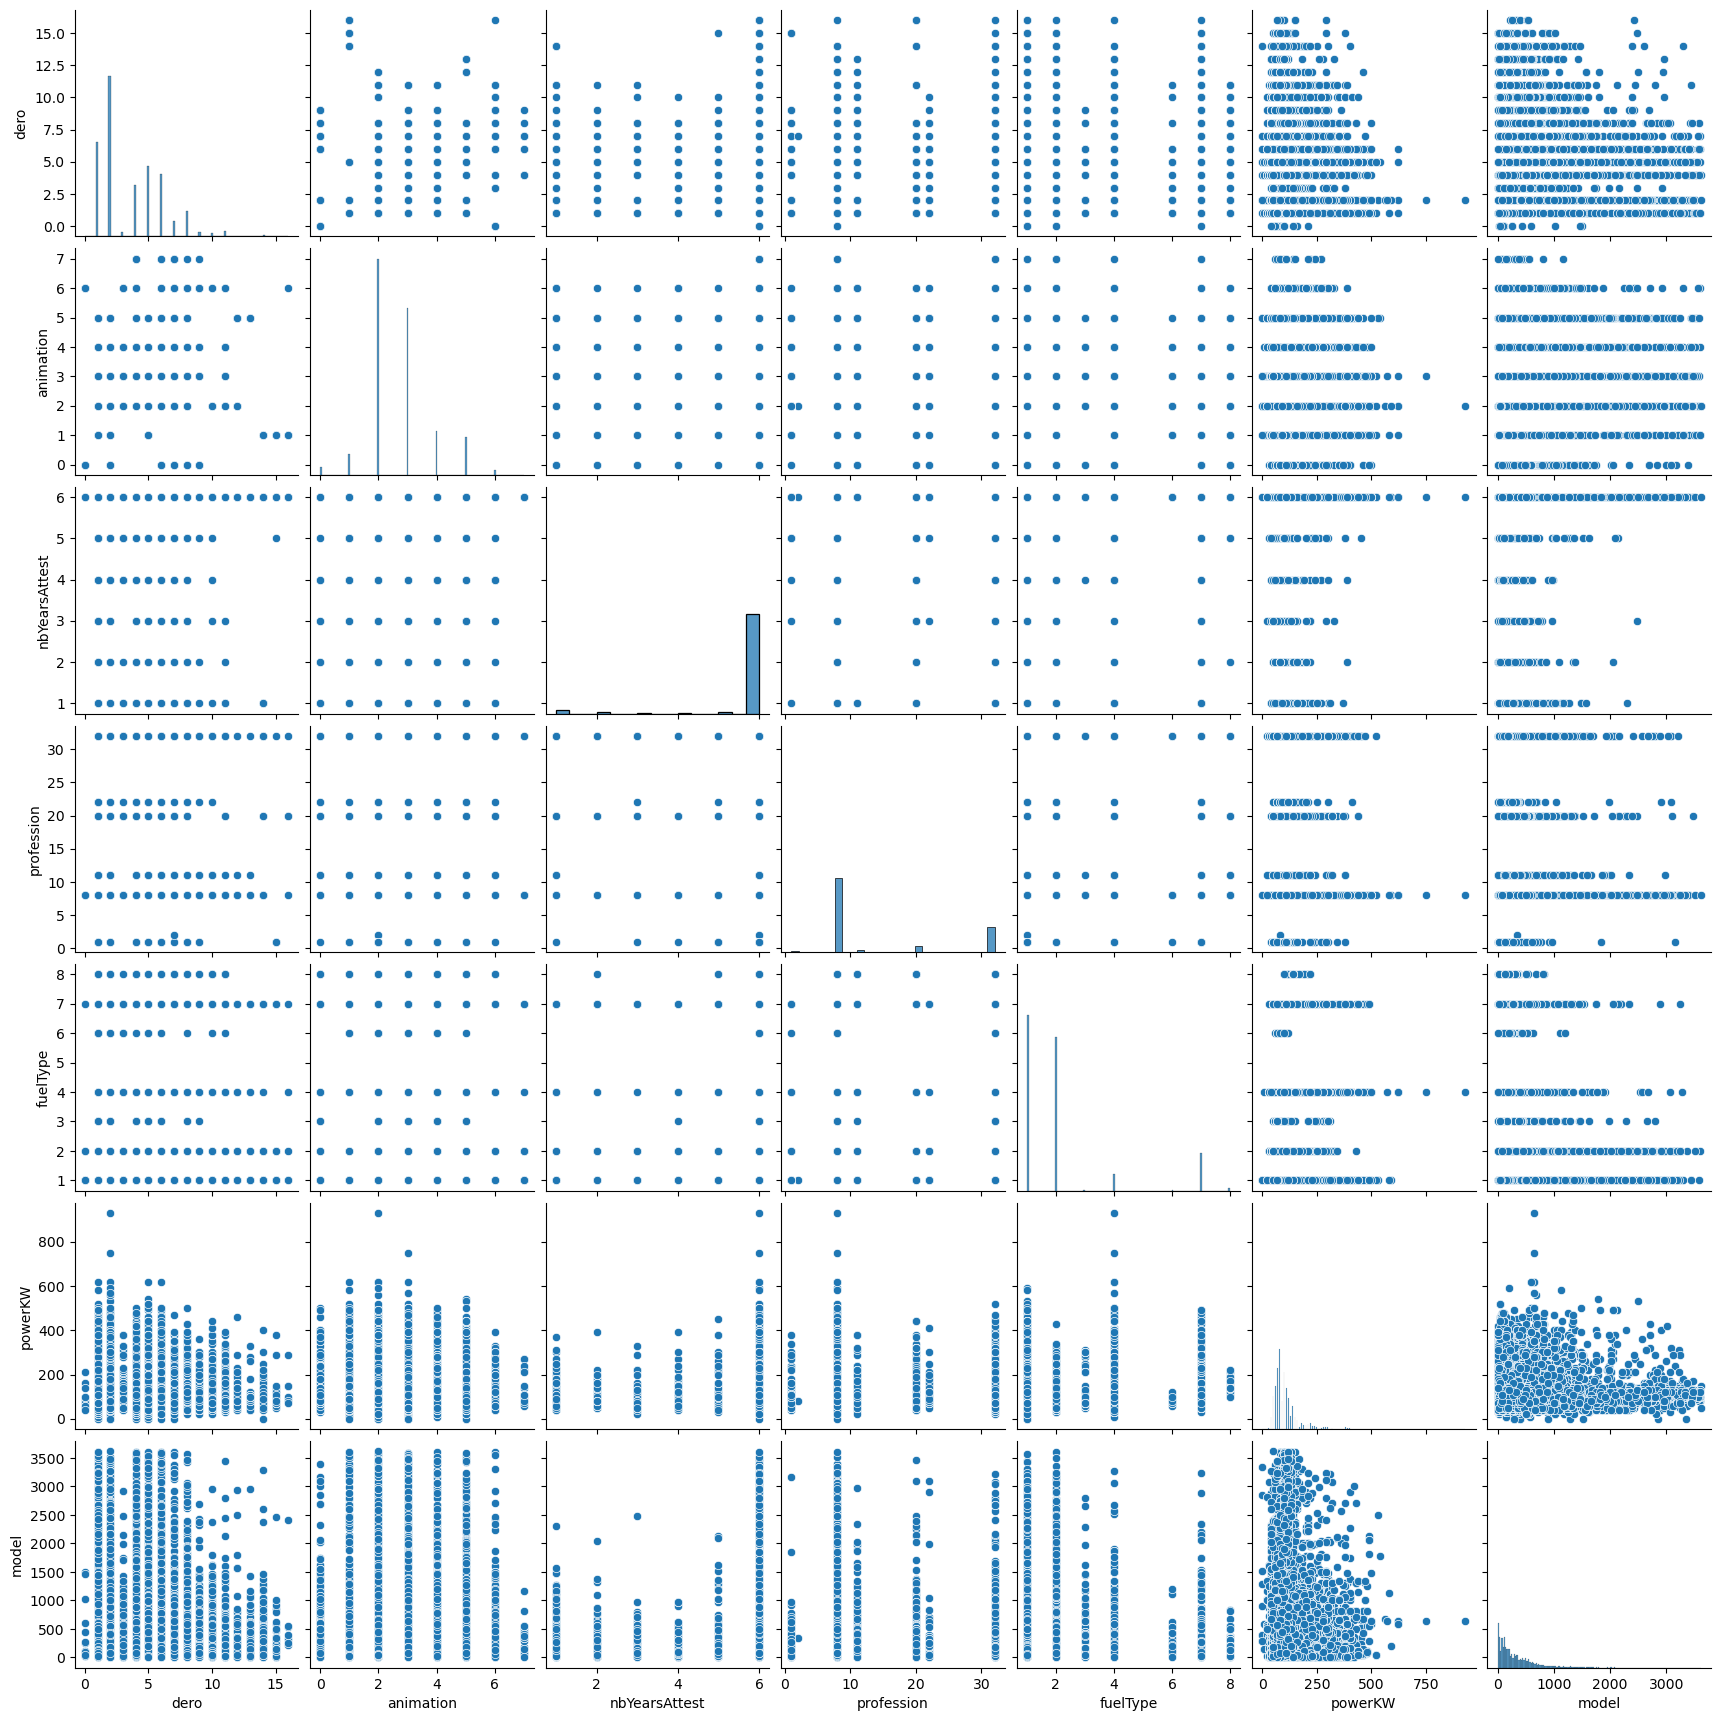

In [480]:
vars = [
 'dero',
 'animation',
 'nbYearsAttest',
 'profession',
 'fuelType',
 'powerKW',
 'model',
]


sns.pairplot( data, vars = vars)

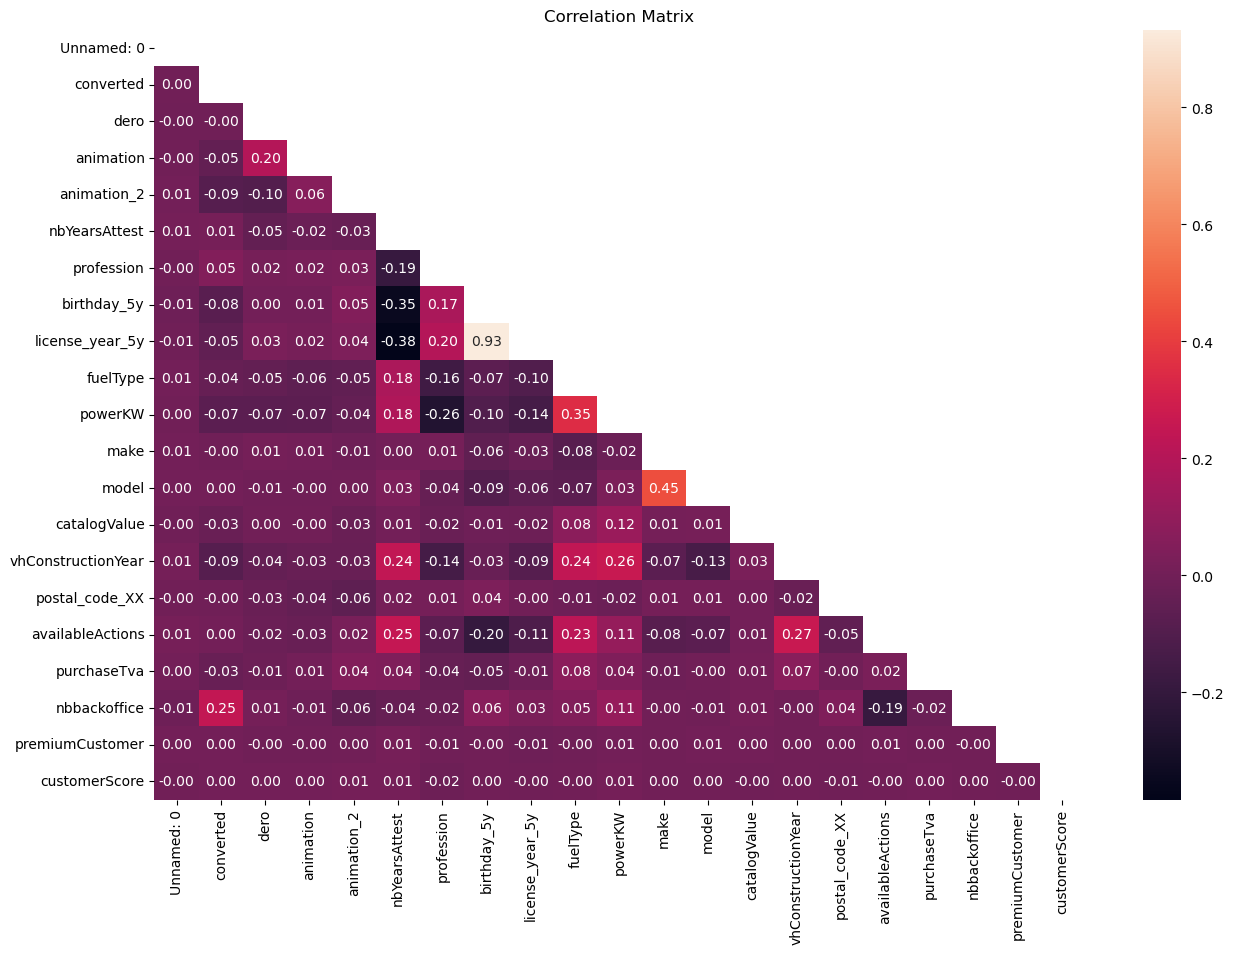

In [485]:
data_2 = data.copy()
data_2.drop(['Year_Month'], axis=1, inplace=True)
data_2["postal_code_XX"] = data_2["postal_code_XX"].replace("33-34", 33)
data_2["postal_code_XX"] = data_2["postal_code_XX"].replace("64-65", 64)
data_2.drop(['isSecondHandVehicle'], axis=1, inplace=True)
data_2.drop(['mainDriverNotDesignated'], axis=1, inplace=True)
corr_matrix = data_2.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,mask = mask,  annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

DATA PROCESSING

In [487]:

data.rename(columns={"Unnamed: 0": "ID"}, inplace = True)
test.rename(columns={"Unnamed: 0": "ID"}, inplace = True)


test['Set'] = 'Test'
data['Set'] = 'Train'


combined_df = pd.concat([test, data], ignore_index=True, sort=False)


combined_df.drop(['Year_Month'], axis=1, inplace=True)
combined_df.drop(['nbYearsAttest'], axis=1, inplace=True)
combined_df.drop(['license_year_5y'], axis=1, inplace=True)
combined_df.drop(['availableActions'], axis=1, inplace=True)

combined_df.head()


mean_powerKW = combined_df['powerKW'][combined_df['powerKW'].notna() & (combined_df['powerKW'] != 0)].mean()
mean_constructionYear = combined_df['vhConstructionYear'][combined_df['vhConstructionYear'].notna() & (combined_df['vhConstructionYear'] < 1950)].mean()


combined_df['powerKW'].replace({0: mean_powerKW, np.nan: mean_powerKW}, inplace=True)
combined_df['vhConstructionYear'] = combined_df['vhConstructionYear'].apply(lambda value: mean_constructionYear if value < 200 else value)
combined_df['birthday_5y'].replace({1695: 1965}, inplace=True)

combined_df['model'].replace({"LANCIA": 9999, "Burstner": 9999, "Carthago": 9999, "LMC": 9999, "HUMMER": 9999, "Benivan": 9999, "Adria": 9999}, inplace=True)


combined_df["postal_code_XX"] = combined_df["postal_code_XX"].replace("33-34", 33)
combined_df["postal_code_XX"] = combined_df["postal_code_XX"].replace("64-65", 64)

combined_df["postal_code_XX"] = combined_df["postal_code_XX"].astype(int)
combined_df['model'] = combined_df['model'].astype(int)



combined_df['premiumCustomer'] = combined_df['premiumCustomer'].map({True: 1, False: 0})


combined_df["profession"] = combined_df["profession"].fillna("0")
combined_df = pd.get_dummies(combined_df, columns=["profession"], prefix="profession")


combined_df['mainDriverNotDesignated'] =combined_df['mainDriverNotDesignated'].fillna(1)
combined_df['mainDriverNotDesignated'] = combined_df['mainDriverNotDesignated'].map({True: 1, False: 0})



combined_df["purchaseTva"] = combined_df["purchaseTva"].fillna(0)
combined_df = pd.get_dummies(combined_df, columns=["purchaseTva"], prefix="purchaseTva")


combined_df["fuelType"] = combined_df["fuelType"].fillna(0)
combined_df = pd.get_dummies(combined_df, columns=["fuelType"], prefix="fuelType")


combined_df['birthday_5y'].fillna(combined_df['birthday_5y'].median(), inplace=True)
combined_df = pd.get_dummies(combined_df, columns=["birthday_5y"], prefix="birthday_5y")
combined_df['vhConstructionYear'].fillna(combined_df['vhConstructionYear'].mean(), inplace=True)
combined_df = pd.get_dummies(combined_df, columns=["vhConstructionYear"], prefix="vhConstructionYear")


combined_df["isSecondHandVehicle"] = combined_df["isSecondHandVehicle"].fillna(0)
combined_df['isSecondHandVehicle'] = combined_df['isSecondHandVehicle'].map({True: 1, False: 0})



bondary_upper = combined_df["catalogValue"].mean() + 2*combined_df['catalogValue'].std()

missing_rows = combined_df['catalogValue'].isna()
df_missing = combined_df[missing_rows]
df_non_missing_2 = combined_df[~missing_rows]
df_non_missing = df_non_missing_2[df_non_missing_2['catalogValue'] <= bondary_upper]


additional_columns = ['fuelType_0.0', 'fuelType_1.0', 'fuelType_2.0', 'fuelType_3.0', 'fuelType_4.0', 'fuelType_6.0', 'fuelType_7.0', 'fuelType_8.0']
X = df_non_missing[['powerKW'] + additional_columns].values


X_train = X.reshape(-1, len(['powerKW'] + additional_columns))

model = LinearRegression()
model.fit(X_train, df_non_missing['catalogValue'])


additional_columns = ['fuelType_0.0', 'fuelType_1.0', 'fuelType_2.0', 'fuelType_3.0', 'fuelType_4.0', 'fuelType_6.0', 'fuelType_7.0', 'fuelType_8.0']
X = df_missing[['powerKW'] + additional_columns].values


X_missing = X.reshape(-1, len(['powerKW'] + additional_columns))


predicted_values = model.predict(X_missing)

combined_df.loc[missing_rows, 'catalogValue'] = predicted_values

combined_df

,ID,dero,animation,animation_2,powerKW,make,model,catalogValue,isSecondHandVehicle,mainDriverNotDesignated,...,vhConstructionYear_2015.0,vhConstructionYear_2015.0834728586535,vhConstructionYear_2016.0,vhConstructionYear_2017.0,vhConstructionYear_2018.0,vhConstructionYear_2019.0,vhConstructionYear_2020.0,vhConstructionYear_2021.0,vhConstructionYear_2022.0,vhConstructionYear_2023.0
0,0,5,2,0,200.0,7,7,60000.000000,1,0,...,False,False,False,False,False,False,False,False,False,True
1,1,2,3,1,50.0,2,841,5000.000000,1,1,...,False,False,False,False,False,False,False,False,False,True
2,2,4,3,0,70.0,7,172,24581.672234,1,0,...,False,False,True,False,False,False,False,False,False,False
3,3,6,2,0,110.0,9,521,38231.993164,1,0,...,False,False,False,False,False,False,False,False,False,False
4,4,1,2,0,110.0,16,1032,40000.000000,1,1,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49923,44923,5,4,0,130.0,32,198,60000.000000,0,0,...,False,False,False,False,False,False,False,False,False,True
49924,44924,2,3,0,140.0,7,7,45359.138498,1,1,...,False,False,False,True,False,False,False,False,False,False
49925,44925,5,2,0,90.0,15,445,30518.091166,1,1,...,False,False,False,False,False,True,False,False,False,False
49926,44926,2,5,0,80.0,9,79,29327.364765,0,0,...,False,False,False,False,False,False,False,False,False,False


In [488]:
combined_df.isna().sum() / combined_df.shape[0] * 100

ID                           0.0
dero                         0.0
animation                    0.0
animation_2                  0.0
powerKW                      0.0
                            ... 
vhConstructionYear_2019.0    0.0
vhConstructionYear_2020.0    0.0
vhConstructionYear_2021.0    0.0
vhConstructionYear_2022.0    0.0
vhConstructionYear_2023.0    0.0
Length: 137, dtype: float64

In [489]:
def categorize_column(column, df):
    
    if pd.api.types.is_numeric_dtype(df[column]):
        
        if df[column].nunique() > 10:
            categorized_column, bins = pd.qcut(df[column], q=10, labels=False, retbins=True, duplicates='drop')
            categorized_column = categorized_column.apply(lambda x: f'Group {x+1}' if x >= 0 else 'Other')
        else:
            categorized_column = df[column].astype(str)
    else:
        
        top_categories = df[column].value_counts().nlargest(9).index
        categorized_column = df[column].apply(lambda x: x if x in top_categories else 'Other')

    return categorized_column


print(combined_df.dtypes)

ID                             int64
dero                           int64
animation                      int64
animation_2                    int64
powerKW                      float64
                              ...   
vhConstructionYear_2019.0       bool
vhConstructionYear_2020.0       bool
vhConstructionYear_2021.0       bool
vhConstructionYear_2022.0       bool
vhConstructionYear_2023.0       bool
Length: 137, dtype: object


In [490]:
combined_df

v_columns = ['dero','animation','animation_2','make','model','postal_code_XX','customerScore']

for col in v_columns:
    combined_df[col + '_categorised'] = categorize_column(col, combined_df)

for col in v_columns:
    combined_df = pd.get_dummies(combined_df, columns=[col + '_categorised'], prefix=col+'_')

In [491]:
data = combined_df[combined_df['Set']=="Train"]

data.drop(['Set','dero','animation','animation_2','make','model','postal_code_XX','customerScore'], axis=1, inplace=True)

X = data.drop(['converted'], axis=1, inplace=False)
y = data['converted']

/var/folders/n1/wcthgfp10kv6zw32ssxrdyg80000gn/T/ipykernel_62833/2726660980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Set','dero','animation','animation_2','make','model','postal_code_XX','customerScore'], axis=1, inplace=True)


In [ ]:
MODELING

Logistic regression

Accuracy of the Logistic Regression model with 'liblinear' solver: 0.69
AUC-ROC Score: 0.7318335266422895


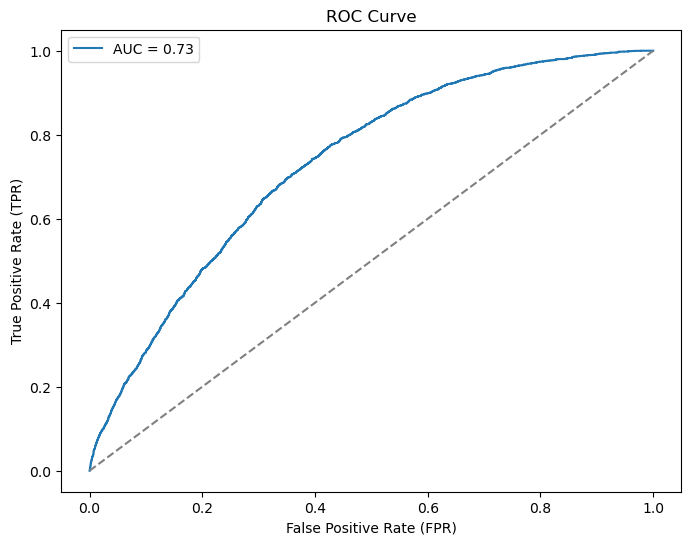

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(solver='liblinear', penalty='l1', C=10)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
positive_class_probabilities = y_prob[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model with 'liblinear' solver: {accuracy:.2f}")


auc = roc_auc_score(y_test, positive_class_probabilities)


print("AUC-ROC Score:", auc)


fpr, tpr, thresholds = roc_curve(y_test, positive_class_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

KNN

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

k_values = list(range(1, 300))
scores = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=5))
    scores.append(score)

sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

optimal_k_index = np.argmax(scores)
optimal_k = k_values[optimal_k_index]
optimal_k


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

k_values = list(range(1, 300))
scores = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)


y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


auc = roc_auc_score(y_test,y_pred_proba)


print("AUC-ROC Score:", auc)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision tree

Accuracy of the Decision Tree Classifier: 0.68
AUC-ROC Score: 0.7294848118165934


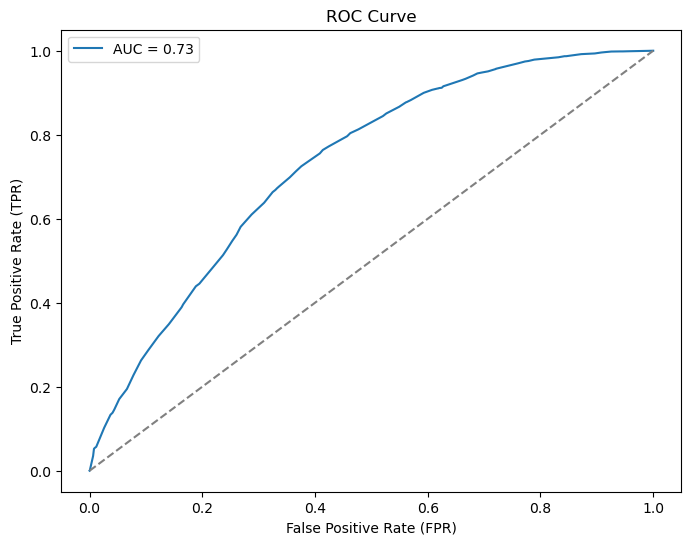

In [493]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(max_depth = 20,min_samples_leaf=10,min_samples_split=1000, random_state=42)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)


positive_class_probabilities = y_prob[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")

from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, positive_class_probabilities)


print("AUC-ROC Score:", auc)


fpr, tpr, thresholds = roc_curve(y_test, positive_class_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
Random Forest

Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.91      0.80      5914
         1.0       0.61      0.26      0.37      3072

    accuracy                           0.69      8986
   macro avg       0.66      0.59      0.58      8986
weighted avg       0.67      0.69      0.65      8986

AUC-ROC Score: 0.7322820122273419


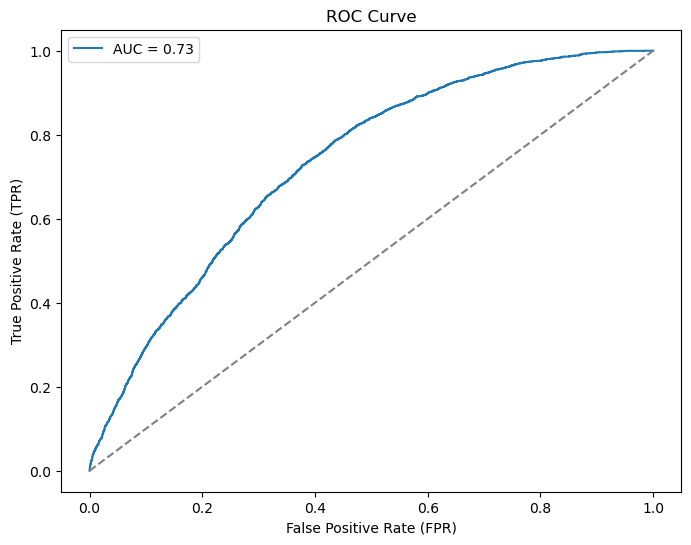

In [494]:
X = data.drop("converted", axis=1) 
y = data["converted"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': randint(10, 200), 
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'max_depth': randint(3, 20), 
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 20), 
    'bootstrap': [True, False], 
}


rf_model = RandomForestClassifier()


roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

randomized_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=kf, scoring='roc_auc', random_state=42, n_jobs=-1)

randomized_search.fit(X_train, y_train)


best_params_random = randomized_search.best_params_

y_pred = randomized_search.predict(X_test)
y_pred_round = np.round(y_pred)


accuracy = accuracy_score(y_test, y_pred_round)
print(f'Accuracy: {accuracy:.2f}')


print('\nClassification Report:')
print(classification_report(y_test, y_pred_round))

y_pred_proba = randomized_search.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)


print("AUC-ROC Score:", auc)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
Gradient Boost

Models comparison

In [ ]:
X = data.drop("converted", axis=1)
y = data["converted"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]


catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
y_pred_proba_catboost = catboost_model.predict_proba(X_test)[:, 1]


auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
auc_catboost = roc_auc_score(y_test, y_pred_proba_catboost)


print("AUC-ROC Score (XGBoost):", auc_xgb)
print("AUC-ROC Score (LightGBM):", auc_lgbm)
print("AUC-ROC Score (CatBoost):", auc_catboost)


fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_proba_lgbm)
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_pred_proba_catboost)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {auc_xgb:.2f}')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'AUC (LightGBM) = {auc_lgbm:.2f}')
plt.plot(fpr_catboost, tpr_catboost, label=f'AUC (CatBoost) = {auc_catboost:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Gradient Boosting Models')
plt.legend()
plt.show()

Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78      5914
         1.0       0.57      0.40      0.47      3072

    accuracy                           0.69      8986
   macro avg       0.65      0.62      0.63      8986
weighted avg       0.67      0.69      0.68      8986

AUC-ROC Score: 0.741937607442791


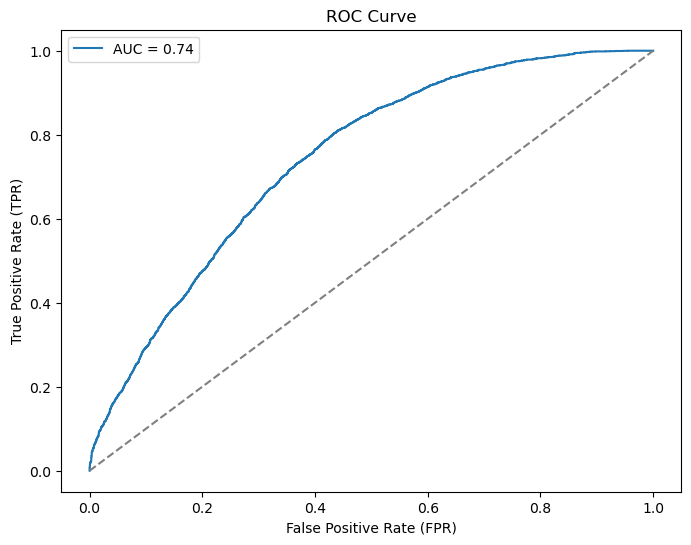

In [495]:

X = data.drop("converted", axis=1)
y = data["converted"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 1),
    'reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda': [0, 1e-5, 1e-2, 0.1, 1, 100],
}


xgb_model = XGBClassifier()

randomized_search = RandomizedSearchCV(
    estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring="roc_auc", random_state=42, n_jobs=-1
)


randomized_search.fit(X_train, y_train)


best_params_random = randomized_search.best_params_


y_pred = randomized_search.predict(X_test)
y_pred_proba = randomized_search.predict_proba(X_test)
y_pred_proba_positive_class = y_pred_proba[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print('\nClassification Report:')
print(classification_report(y_test, y_pred))



auc = roc_auc_score(y_test, y_pred_proba_positive_class)


print("AUC-ROC Score:", auc)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive_class)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


LGBM

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

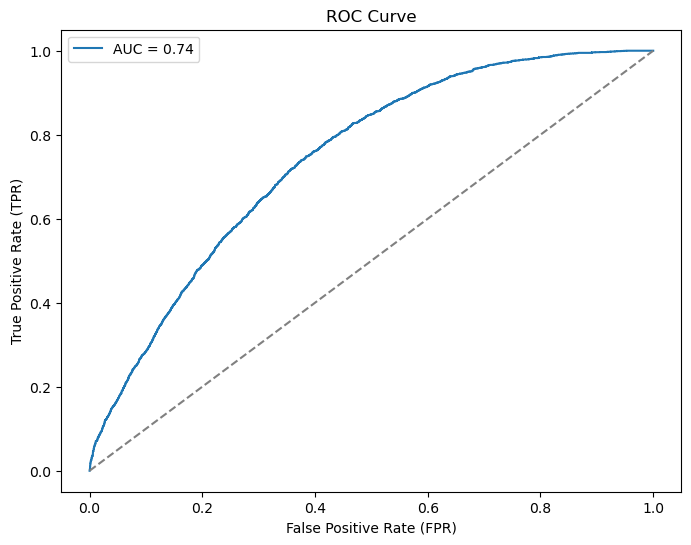

In [496]:
X = data.drop("converted", axis=1)
y = data["converted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda': [0, 1e-5, 1e-2, 0.1, 1, 100],
}


light_model = LGBMClassifier()


randomized_search = RandomizedSearchCV(
    estimator=light_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring="roc_auc", random_state=42, n_jobs=-1
)


randomized_search.fit(X_train, y_train)


best_params_random = randomized_search.best_params_


y_pred = randomized_search.predict(X_test)
y_pred_proba = randomized_search.predict_proba(X_test)
y_pred_proba_positive_class = y_pred_proba[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print('\nClassification Report:')
print(classification_report(y_test, y_pred))


auc = roc_auc_score(y_test, y_pred_proba_positive_class)


print("AUC-ROC Score:", auc)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive_class)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


CatBoost

0:	learn: 0.6429965	total: 183ms	remaining: 28.3s
0:	learn: 0.6442837	total: 144ms	remaining: 22.3s
1:	learn: 0.6151371	total: 246ms	remaining: 18.9s
0:	learn: 0.6433032	total: 161ms	remaining: 24.9s
1:	learn: 0.6146740	total: 179ms	remaining: 13.8s
0:	learn: 0.6430645	total: 136ms	remaining: 21.1s
2:	learn: 0.5950997	total: 288ms	remaining: 14.7s
2:	learn: 0.5955302	total: 216ms	remaining: 11s
1:	learn: 0.6131117	total: 203ms	remaining: 15.7s
0:	learn: 0.6447980	total: 134ms	remaining: 20.7s
1:	learn: 0.6131052	total: 177ms	remaining: 13.7s
2:	learn: 0.5939866	total: 239ms	remaining: 12.2s
3:	learn: 0.5817300	total: 254ms	remaining: 9.64s
3:	learn: 0.5818236	total: 335ms	remaining: 12.7s
0:	learn: 0.6438971	total: 115ms	remaining: 17.8s
0:	learn: 0.6436871	total: 105ms	remaining: 16.3s
2:	learn: 0.5939117	total: 224ms	remaining: 11.4s
1:	learn: 0.6125385	total: 183ms	remaining: 14.1s
3:	learn: 0.5823350	total: 292ms	remaining: 11.1s
4:	learn: 0.5737754	total: 319ms	remaining: 9.63s
1:

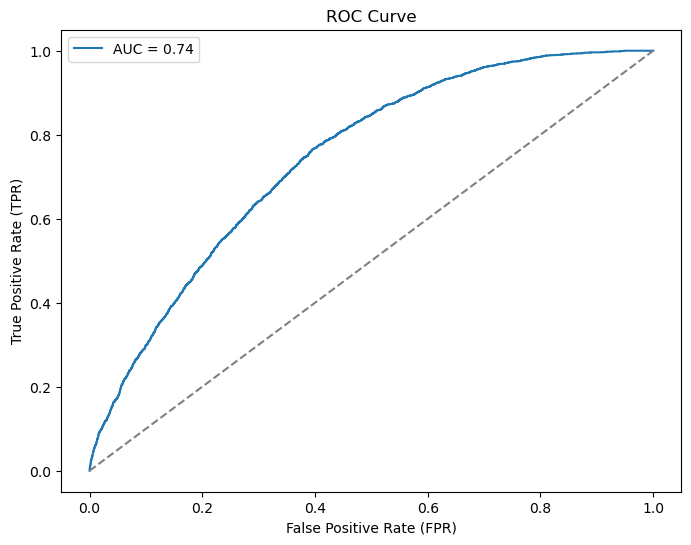

In [497]:
X = data.drop("converted", axis=1)
y = data["converted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_dist = {
    'iterations': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'depth': randint(3, 10),
    'l2_leaf_reg': uniform(0, 5),
    'border_count': randint(32, 128),
    'random_strength': uniform(0, 1),
    'bagging_temperature': uniform(0, 3),
}

catboost_model = CatBoostClassifier()


randomized_search = RandomizedSearchCV(
    estimator=catboost_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring="roc_auc", random_state=42, n_jobs=-1
)


randomized_search.fit(X_train, y_train)


best_params_random = randomized_search.best_params_


y_pred = randomized_search.predict(X_test)
y_pred_proba = randomized_search.predict_proba(X_test)
y_pred_proba_positive_class = y_pred_proba[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print('\nClassification Report:')
print(classification_report(y_test, y_pred))


auc = roc_auc_score(y_test, y_pred_proba_positive_class)


print("AUC-ROC Score:", auc)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive_class)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


ANN

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 20)                3720      
                                                                 
 batch_normalization_20 (Ba  (None, 20)                80        
 tchNormalization)                                               
                                                                 
 dropout_20 (Dropout)        (None, 20)                0         
                                                                 
 dense_26 (Dense)            (None, 30)                630       
                                                                 
 batch_normalization_21 (Ba  (None, 30)                120       
 tchNormalization)                                               
                                                                 
 dropout_21 (Dropout)        (None, 30)               

Epoch 1/50
1124/1124 [==============================] - 3s 1ms/step - loss: 2.2849 - binary_accuracy: 0.5721 - val_loss: 1.0456 - val_binary_accuracy: 0.6571
Epoch 2/50
1124/1124 [==============================] - 1s 1ms/step - loss: 0.9154 - binary_accuracy: 0.6367 - val_loss: 0.7871 - val_binary_accuracy: 0.6575
Epoch 3/50
1124/1124 [==============================] - 1s 1ms/step - loss: 0.7319 - binary_accuracy: 0.6521 - val_loss: 0.6585 - val_binary_accuracy: 0.6679
Epoch 4/50
1124/1124 [==============================] - 2s 1ms/step - loss: 0.6618 - binary_accuracy: 0.6602 - val_loss: 0.6202 - val_binary_accuracy: 0.6762
Epoch 5/50
1124/1124 [==============================] - 1s 1ms/step - loss: 0.6393 - binary_accuracy: 0.6634 - val_loss: 0.6071 - val_binary_accuracy: 0.6857
Epoch 6/50
1124/1124 [==============================] - 1s 1ms/step - loss: 0.6310 - binary_accuracy: 0.6607 - val_loss: 0.6088 - val_binary_accuracy: 0.6803
Epoch 7/50
1124/1124 [==============================

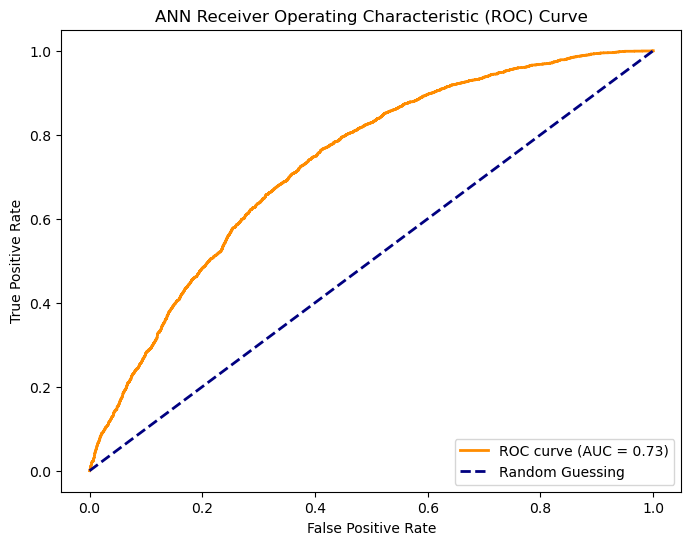

In [498]:


X = data.drop(["converted","ID"], axis=1)
Y = data["converted"]

X = X.astype('float32')
Y = Y.astype('float32')


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20)


ann = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(X.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.20)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid'),
])
ann.summary()
k.utils.plot_model(ann, show_shapes=True)


initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=50000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, epsilon=1e-07)


ann.compile(optimizer=optimizer, loss=k.losses.binary_crossentropy, metrics=[k.metrics.binary_accuracy])


early_stopping = k.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


ann.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

y_pred_proba = ann.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


auc = roc_auc_score(y_test,y_pred_proba)


print("AUC-ROC Score:", auc)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()